# Final Project Sample Code

In [1]:
#Install Libraries

#!pip install numpy
#!pip install pandas
#!pip install sklearn
#!pip install scipy

In [1]:
#Import Libraries

import csv
import random
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as sch


%matplotlib inline

# What does our Data look like?

In [2]:
df = pd.read_csv('metadata.csv')
df.info(verbose=True)
df.head()

C:\Users\Zain\Anaconda3\envs\MLenv\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (1,4,5,6,13,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497906 entries, 0 to 497905
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   cord_uid          497906 non-null  object 
 1   sha               172105 non-null  object 
 2   source_x          497906 non-null  object 
 3   title             497674 non-null  object 
 4   doi               281753 non-null  object 
 5   pmcid             182522 non-null  object 
 6   pubmed_id         241936 non-null  object 
 7   license           497906 non-null  object 
 8   abstract          363064 non-null  object 
 9   publish_time      497687 non-null  object 
 10  authors           484020 non-null  object 
 11  journal           464755 non-null  object 
 12  mag_id            0 non-null       float64
 13  who_covidence_id  197568 non-null  object 
 14  arxiv_id          6687 non-null    object 
 15  pdf_json_files    172105 non-null  object 
 16  pmc_json_files    13

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN


In [3]:
import numpy as np 
import pandas as pd 

# load the meta data from the CSV file and extract out fields that will be useful to our application

df = df[['title','abstract','authors','publish_time']]
df = df.drop_duplicates(subset='abstract', keep="first")
df=df.dropna()
df["abstract"] = df["abstract"].str.lower()
df.head()

,title,abstract,authors,publish_time
0,Clinical features of culture-proven Mycoplasma...,objective: this retrospective chart review des...,"Madani, Tariq A; Al-Ghamdi, Aisha A",2001-07-04
1,Nitric oxide: a pro-inflammatory mediator in l...,inflammatory diseases of the respiratory tract...,"Vliet, Albert van der; Eiserich, Jason P; Cros...",2000-08-15
2,Surfactant protein-D and pulmonary host defense,surfactant protein-d (sp-d) participates in th...,"Crouch, Erika C",2000-08-25
3,Role of endothelin-1 in lung disease,endothelin-1 (et-1) is a 21 amino acid peptide...,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",2001-02-22
4,Gene expression in epithelial cells in respons...,respiratory syncytial virus (rsv) and pneumoni...,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",2001-05-11


# Looking into COVID-19 Symptoms

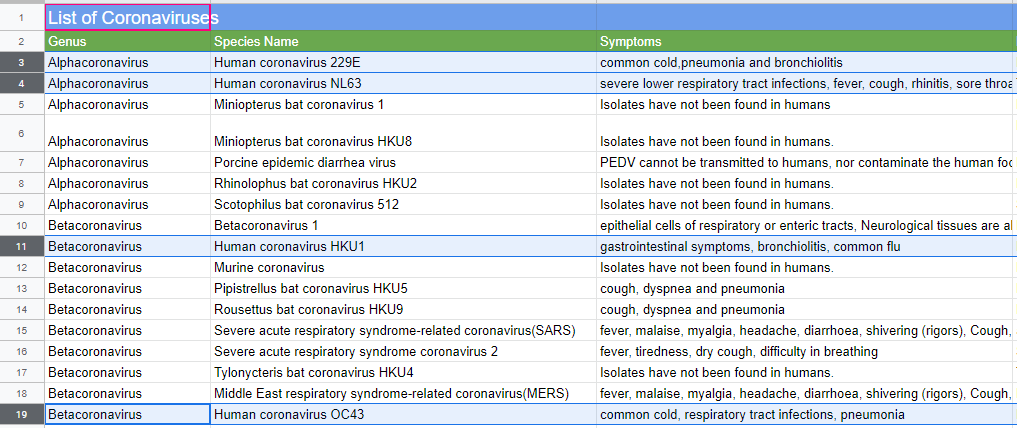

In [157]:
from IPython.display import Image
#We want to study the symptoms of COVID-19 and how they manifest



#Lets do some research for popular virus symptoms:
Image(filename='onlinesymptoms.png')

In [4]:
#Define your list of symptoms from above

symptoms = ['cold', 'fever', 'cough', 'rhinitis', 'sore throat', 'hoarseness', 'bronchitis', 'bronchiolitis', 'pneumonia', 'shortness of breath']
#shortness of breath = dyspnoea
#breathlessness

# Lets visualize which symptoms we find in our data

{'cold': 0, 'fever': 0, 'cough': 0, 'rhinitis': 0, 'sore throat': 0, 'hoarseness': 0, 'bronchitis': 0, 'bronchiolitis': 0, 'pneumonia': 0, 'shortness of breath': 0}
{'cold': 2244, 'fever': 11573, 'cough': 7566, 'rhinitis': 390, 'sore throat': 1059, 'hoarseness': 55, 'bronchitis': 1703, 'bronchiolitis': 701, 'pneumonia': 16976, 'shortness of breath': 1604}


C:\Users\Zain\Anaconda3\envs\MLenv\lib\site-packages\matplotlib\figure.py:2314: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  warnings.warn("Calling figure.constrained_layout, but figure not "


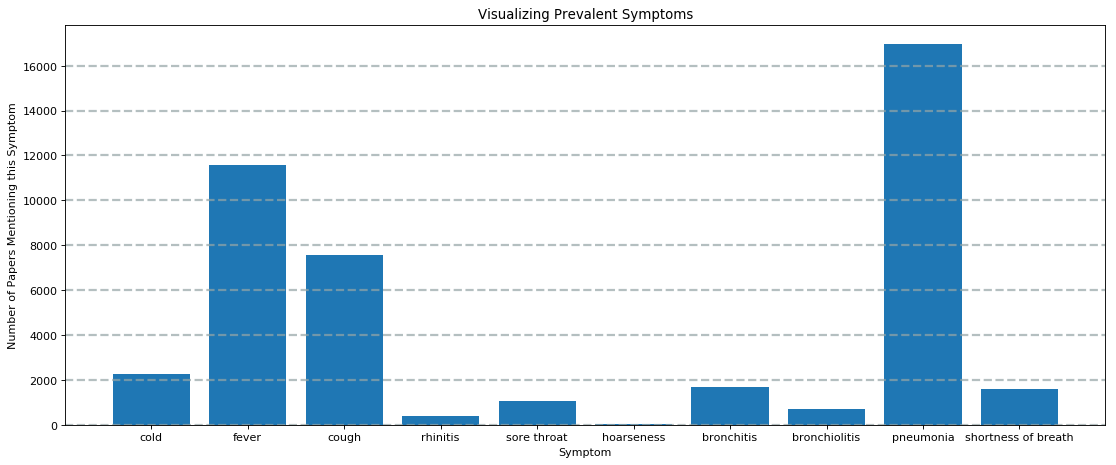

In [5]:
#Lets do some preliminary exploratory data analysis

symptom_count = dict((symptom,0) for symptom in symptoms)

print(symptom_count)

for symptom in symptom_count:
    for abstract in df['abstract']:
        if str(symptom) in abstract:
            symptom_count[symptom] += 1


print(symptom_count)

loc = np.arange(len(symptom_count))
width = 0.35

fig = plt.figure(num=None, constrained_layout=True, figsize=(13, 5), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_axes([0,0,1,1])

ax.bar(symptom_count.keys(),symptom_count.values())
ax.set_xticks(loc, tuple(symptoms))

ax.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
ax.set_ylabel('Number of Papers Mentioning this Symptom')
ax.set_xlabel('Symptom')
ax.set_title('Visualizing Prevalent Symptoms')
plt.show()


In [6]:
#Hoarseness doesn't seem to be very important, lets pop it

symptoms.pop(5)
print(symptoms)

['cold', 'fever', 'cough', 'rhinitis', 'sore throat', 'bronchitis', 'bronchiolitis', 'pneumonia', 'shortness of breath']


# Lets define our distance matrix

In [6]:
#Define the metric that will be used to define the "distance" metric used in the heirarchical clustering algorithm
symptom_dist = np.zeros((len(symptoms),len(symptoms)), dtype=float)
print(symptom_dist)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [7]:
df_symptoms = pd.DataFrame(symptom_dist, columns=symptoms, index=symptoms)
df_symptoms

,cold,fever,cough,rhinitis,sore throat,hoarseness,bronchitis,bronchiolitis,pneumonia,shortness of breath
cold,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fever,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cough,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
rhinitis,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sore throat,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hoarseness,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
bronchitis,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
bronchiolitis,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pneumonia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
shortness of breath,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
#Helper function that will calculate the distance

def cumulative_dist(symptom1, symptom2, df):
    cum_sum = 0
    number_of_papers = 0
    if symptom1 == symptom2: return 0
    
    for abstract in df['abstract']:
        if ((symptom1 in abstract) and (symptom2 in abstract)):
            number_of_papers += 1
            cum_sum -= 1
        elif (((symptom1 in abstract) and (symptom2 not in abstract)) or ((symptom1 not in abstract) and (symptom2 in abstract))):
            number_of_papers += 1
            cum_sum += 1
    return cum_sum/number_of_papers


#Populate Matrix of symptom distances by mining the text of the papers found in the database and using the distance rule as

#For a symptom A and B mentioned in a paper together the distanceA_B += 1 
# or distanceA_B -= 1 if they are not mentioned together

symptom_dist = np.zeros((len(symptoms),len(symptoms)),float)
symptom_dist1 = np.zeros((len(symptoms),len(symptoms)),float)
#print(symptom_dist)
#print()
for i in range(len(symptoms)):
    for j in range(len(symptoms)):
        symptom_dist[i][j] = cumulative_dist(symptoms[i],symptoms[j], df)
        symptom_dist1[i][j] = cumulative_dist(symptoms[i],symptoms[j], df)**6

In [9]:
df_symptoms = pd.DataFrame(symptom_dist1, columns=symptoms, index=symptoms)
print('Our distance matrix looks like this:')   
df_symptoms

Our distance matrix looks like this:


,cold,fever,cough,rhinitis,sore throat,hoarseness,bronchitis,bronchiolitis,pneumonia,shortness of breath
cold,0.000000,0.856388,0.792504,0.869474,0.803795,0.989597,0.839255,0.827656,0.849116,0.915203
fever,0.856388,0.000000,0.000236,0.945839,0.427198,0.993821,0.956361,0.934048,0.298901,0.268300
cough,0.792504,0.000236,0.000000,0.902317,0.259446,0.962684,0.902386,0.927785,0.353192,0.137396
rhinitis,0.869474,0.945839,0.902317,0.000000,0.843374,0.973276,0.949283,0.863738,0.976009,0.993994
sore throat,0.803795,0.427198,0.259446,0.843374,0.000000,0.736588,0.961406,0.979685,0.857659,0.463699
hoarseness,0.989597,0.993821,0.962684,0.973276,0.736588,0.000000,1.000000,0.984211,0.995076,0.992784
bronchitis,0.839255,0.956361,0.902386,0.949283,0.961406,1.000000,0.000000,0.729563,0.862907,0.981966
bronchiolitis,0.827656,0.934048,0.927785,0.863738,0.979685,0.984211,0.729563,0.000000,0.815818,0.994803
pneumonia,0.849116,0.298901,0.353192,0.976009,0.857659,0.995076,0.862907,0.815818,0.000000,0.756925
shortness of breath,0.915203,0.268300,0.137396,0.993994,0.463699,0.992784,0.981966,0.994803,0.756925,0.000000


# Perform Hierarchical Clustering using our distance matrix

In [10]:
# Distance was magnified prior to Hierarchical Clustering
Y = sch.linkage(symptom_dist1, method='centroid')

C:\Users\Zain\Anaconda3\envs\MLenv\lib\site-packages\ipykernel_launcher.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


Text(0.5, 1.0, 'Dendrogram Displaying COVID-19 Symptom Clusters')

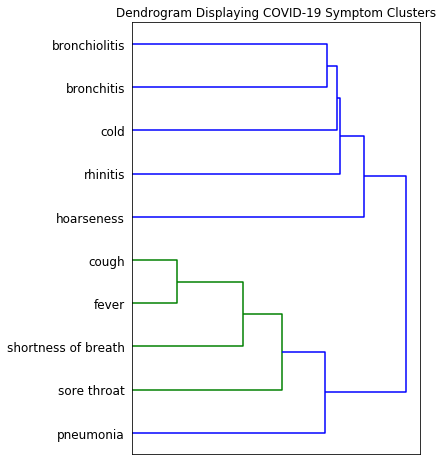

In [11]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_axes([0.1,0.1,0.4,0.6])

# Get the dendrogram
Z1 = sch.dendrogram(Y, orientation='right')

ax1.set_xticks([])
labels = df_symptoms.columns[Z1['leaves']]
ax1.set_yticklabels(labels)
ax1.set_title("Dendrogram Displaying COVID-19 Symptom Clusters")
#plt.savefig('COVID_clustering.png', format='png', bbox_inches='tight', dpi=600)

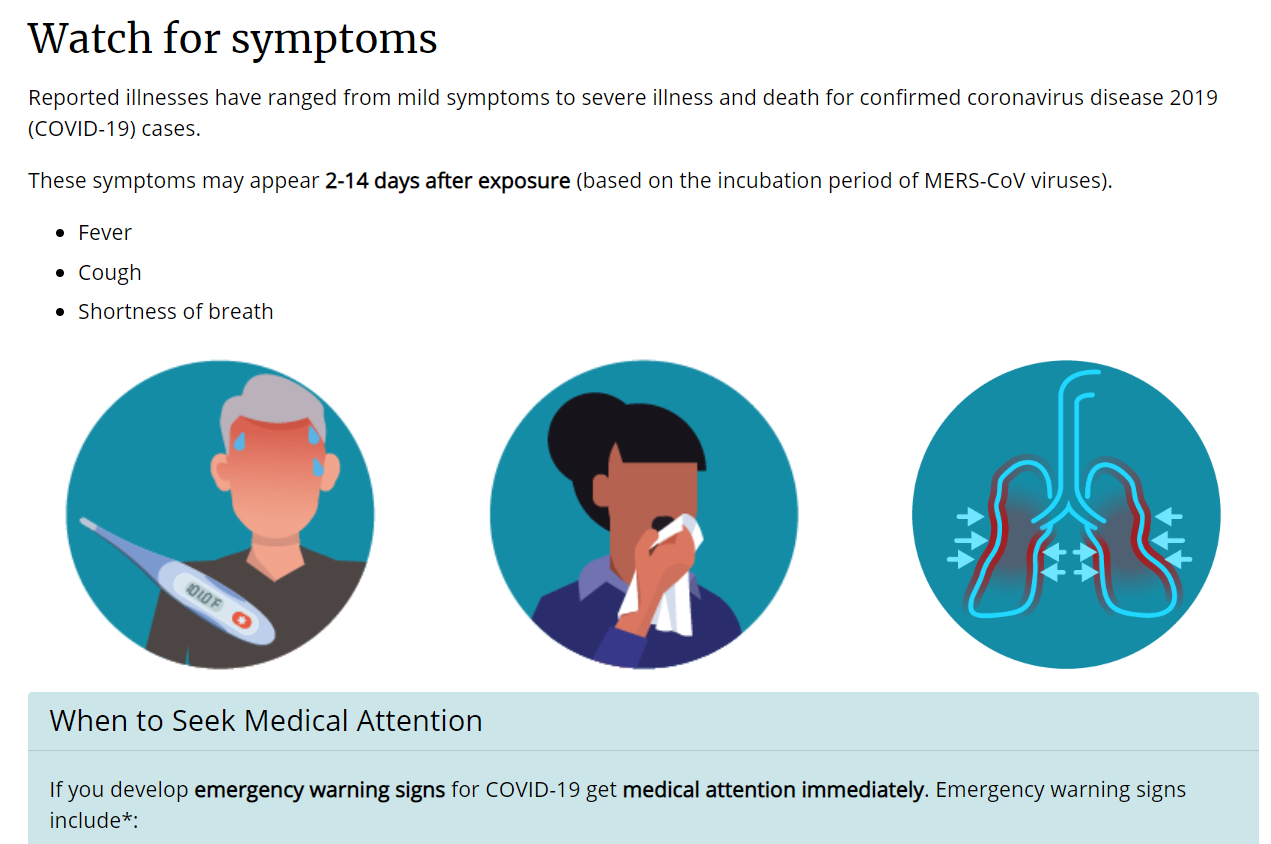

In [167]:
Image(filename='symptoms.png')

# Using the insights derived from your model, suggest how action can be taken against COVID-19